Importation des librairies

In [48]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Configuration d'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("crest")


Importation du csv autos.csv

In [49]:
#importation du csv
df = pd.read_csv("autos.csv", encoding='latin1')

# Taille du dataset
print(f" Jeu de données chargé : {df.shape[0]} lignes et {df.shape[1]} colonnes\n")

# Aperçu des 5 premières lignes
display(df.head())

# Types de données
print("\n🔎 Informations générales :")
print(df.info())


 Jeu de données chargé : 371528 lignes et 21 colonnes



,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21



🔎 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand 

Nettoyage des noms des colonnes

In [50]:

# On met les noms en minuscules, sans espaces, et avec underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Noms de colonnes nettoyés :")
print(df.columns.tolist())


Noms de colonnes nettoyés :
['index', 'datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest', 'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model', 'kilometer', 'monthofregistration', 'fueltype', 'brand', 'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode', 'lastseen']


Supressions de potentiels doublons :

In [51]:

nb_doublons = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Nombre de doublons supprimés : {nb_doublons}")
print(f"Nouvelle taille du dataset : {df.shape}")


Nombre de doublons supprimés : 0
Nouvelle taille du dataset : (371528, 21)


suppression des lignes sans modèle de véhicule (informations essentielles), puis remplace les valeurs manquantes : les colonnes textuelles reçoivent la valeur `"unknown"` et les colonnes numériques sont complétées par leur médiane. Cela garantit un jeu de données complet et exploitable.


In [52]:


# Comptage des valeurs manquantes
missing = df.isna().sum().sort_values(ascending=False)
print("Valeurs manquantes par colonne :\n", missing.head(10))

# Suppression des lignes sans modèle (car c'est une info essentielle)
if 'model' in df.columns:
    lignes_avant = df.shape[0]
    df = df.dropna(subset=['model'])
    print(f"\n Lignes supprimées car 'model' manquant : {lignes_avant - df.shape[0]}")

#suppression des lignes sans gearbox (feature trop importante)
if 'gearbox' in df.columns:
    lignes_avant = df.shape[0]
    df = df.dropna(subset=['gearbox'])
    print(f"Lignes supprimées car 'gearbox' manquant : {lignes_avant - df.shape[0]}")

print("Valeurs aberrantes et lignes incomplètes supprimées.")
print("Taille actuelle du dataset :", df.shape)

# Remplissage des valeurs manquantes pour certaines colonnes textuelles
for col in ['gearbox', 'fueltype', 'notrepaireddamage']:
    if col in df.columns:
        df[col] = df[col].fillna('unknown')

# Remplissage des colonnes numériques avec la médiane
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\n Valeurs manquantes traitées.")


Valeurs manquantes par colonne :
 notrepaireddamage    72060
vehicletype          37869
fueltype             33386
model                20484
gearbox              20209
offertype                0
seller                   0
name                     0
datecrawled              0
index                    0
dtype: int64

 Lignes supprimées car 'model' manquant : 20484
Lignes supprimées car 'gearbox' manquant : 15976
Valeurs aberrantes et lignes incomplètes supprimées.
Taille actuelle du dataset : (335068, 21)

 Valeurs manquantes traitées.


/tmp/ipython-input-2823693959.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Filtrage des années et dans prix n'ayant aucun sens :

In [53]:


if 'price' in df.columns:
    df = df[(df['price'] > 100)]
# Filtrage des années hors bornes réalistes
if 'yearofregistration' in df.columns:
    df = df[(df['yearofregistration'] >= 1950) & (df['yearofregistration'] <= 2025)]

print("✅ Valeurs aberrantes supprimées.")
print("Taille actuelle du dataset :", df.shape)


✅ Valeurs aberrantes supprimées.
Taille actuelle du dataset : (325766, 21)


Conversion des dates :

In [54]:


date_cols = [c for c in df.columns if 'date' in c.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Colonnes de dates converties :", date_cols)


Colonnes de dates converties : ['datecrawled', 'datecreated']


In [55]:

print("Dimensions finales :", df.shape)
print("\nRésumé statistique :")
display(df.describe(include='all').T.head(10))
print(df.head())


Dimensions finales : (325766, 21)

Résumé statistique :


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
index,325766.0,NaN,NaN,NaN,185767.877449,0.0,92811.25,185784.0,278684.75,371527.0,107294.191222
datecrawled,325766,NaN,NaN,NaN,2016-03-21 13:52:24.777478144,2016-03-05 14:06:22,2016-03-13 13:22:08.249999872,2016-03-21 18:45:25.500000,2016-03-29 15:04:30.500000,2016-04-07 14:36:58,NaN
name,325766,200384,BMW_318i,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller,325766,2,privat,325764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offertype,325766,2,Angebot,325765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,325766.0,NaN,NaN,NaN,9587.321851,101.0,1350.0,3300.0,7800.0,99999999.0,535627.541573
abtest,325766,2,test,168755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicletype,303781,8,limousine,88219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearofregistration,325766.0,NaN,NaN,NaN,2003.634314,1950.0,1999.0,2004.0,2008.0,2019.0,7.03431
gearbox,325766,2,manuell,253751,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   index         datecrawled  \
0      0 2016-03-24 11:52:17   
2      2 2016-03-14 12:52:21   
3      3 2016-03-17 16:54:04   
4      4 2016-03-31 17:25:20   
5      5 2016-04-04 17:36:23   

                                                name  seller offertype  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                GOLF_4_1_4__3TÃRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
5  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat   Angebot    650   

  abtest vehicletype  yearofregistration    gearbox  powerps  model  \
0   test         NaN                1993    manuell        0   golf   
2   test         suv                2004  automatik      163  grand   
3   test  kleinwagen                2001    manuell       75   golf   
4   test  kleinwagen                

Rapide exploration des données afin d'obtenir quelques informations sur notre dataset :

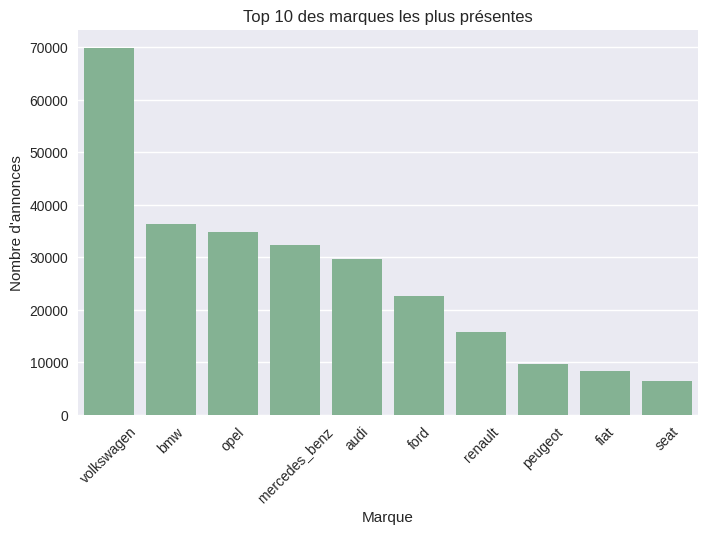

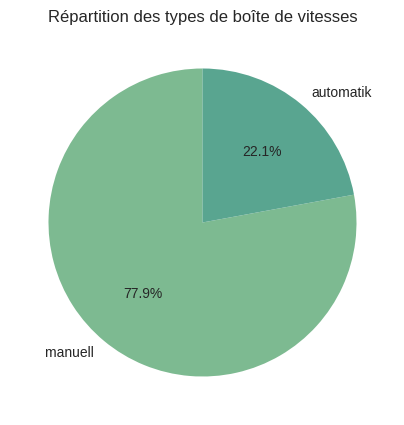

In [56]:
# Marques les plus fréquentes
if 'brand' in df.columns:
    plt.figure(figsize=(8,5))
    top_brands = df['brand'].value_counts().head(10)
    sns.barplot(x=top_brands.index, y=top_brands.values)
    plt.title("Top 10 des marques les plus présentes")
    plt.xlabel("Marque")
    plt.ylabel("Nombre d'annonces")
    plt.xticks(rotation=45)
    plt.show()

# Répartition des boîtes de vitesses
if 'gearbox' in df.columns:
    plt.figure(figsize=(5,5))
    df['gearbox'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title("Répartition des types de boîte de vitesses")
    plt.ylabel('')
    plt.show()


Exploration rapide des données :